<a href="https://colab.research.google.com/github/Chhaya-cloud/Chatbot/blob/main/KNN_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


In [4]:
# Loading the data
iris = load_iris()
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [5]:
# EDA
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [6]:
# Separating the input features and target variable
x = iris.data
y = iris.target

# printing the  shape
print(x.shape)
print(y.shape)

(150, 4)
(150,)


In [7]:
# Perform train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

In [23]:
# Searching for optimal values
from sklearn.model_selection import cross_val_score

# List the scores from k_range
k_range = range(1, 26)
k_scores = []

# Perform algorithm search
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, x_train, y_train, cv=5, scoring = 'accuracy')
    k_scores.append(score.mean()) # Changed scores to score
# Plot the results
print(k_scores)



[np.float64(0.975), np.float64(0.9666666666666668), np.float64(0.975), np.float64(0.9666666666666668), np.float64(0.9833333333333334), np.float64(0.9583333333333334), np.float64(0.9666666666666668), np.float64(0.9666666666666668), np.float64(0.9833333333333334), np.float64(0.975), np.float64(0.9833333333333334), np.float64(0.975), np.float64(0.9833333333333334), np.float64(0.975), np.float64(0.9666666666666666), np.float64(0.975), np.float64(0.975), np.float64(0.95), np.float64(0.9583333333333334), np.float64(0.95), np.float64(0.95), np.float64(0.95), np.float64(0.95), np.float64(0.95), np.float64(0.9333333333333333)]


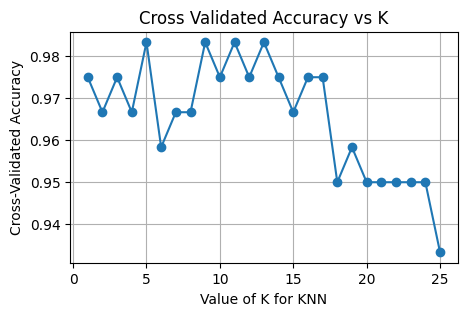

In [26]:
# Plotting the values of K for kNN
plt.figure(figsize=(5, 3))
plt.plot(k_range, k_scores, marker = 'o')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Cross Validated Accuracy vs K')
plt.grid()
plt.show()

In [ ]:
# From the above plot k=5,9,11,13 are giving best results to us.
# By the first rule, k%n!= 0, we can remove  9 by this logic
# Out of k = 5, 11 and 13, we will select the highest value which is 13 because higher values of k  for same performance  gives smoother  curve.

In [27]:
# Optimum Model
knn = KNeighborsClassifier(n_neighbors=13)
# Fitting the model
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=13)

In [39]:
# taking predictions from the model
y_train_pred = knn.predict(x_train) # Changed x_test to x_train for training predictions
y_test_pred = knn.predict(x_test)

In [40]:

# Evaluating the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import sklearn # Import the sklearn module directly
# Use sklearn.metrics instead of just metrics
print('Training Precision:', np.round(sklearn.metrics.precision_score(y_train, y_train_pred, average = 'weighted'),2))
print('Testing Precision:', np.round(sklearn.metrics.precision_score(y_test, y_test_pred, average = 'weighted'),2))
print('Training Recall:', np.round(sklearn.metrics.recall_score(y_train, y_train_pred, average = 'weighted'),2))
print('Testing Recall:', np.round(sklearn.metrics.recall_score(y_test, y_test_pred, average = 'weighted'),2))
print('Training Accuracy:', np.round(sklearn.metrics.accuracy_score(y_train, y_train_pred),2))
print('Testing Accuracy:', np.round(sklearn.metrics.accuracy_score(y_test, y_test_pred),2))
print('Training f1 score:', np.round(sklearn.metrics.confusion_matrix(y_train, y_train_pred)))
print('Testing f1 score:', np.round(sklearn.metrics.confusion_matrix(y_test, y_test_pred)))


Training Precision: 0.98
Testing Precision: 0.97
Training Recall: 0.98
Testing Recall: 0.97
Training Accuracy: 0.98
Testing Accuracy: 0.97
Training f1 score: [[42  0  0]
 [ 0 38  1]
 [ 0  1 38]]
Testing f1 score: [[ 8  0  0]
 [ 0 10  1]
 [ 0  0 11]]


In [ ]:
# The above model looks optimum.